<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/fashion%20mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)
 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [12]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4035 - accuracy: 0.8550 - val_loss: 0.3259 - val_accuracy: 0.8827
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2777 - accuracy: 0.8996 - val_loss: 0.2877 - val_accuracy: 0.8929
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2350 - accuracy: 0.9131 - val_loss: 0.2942 - val_accuracy: 0.8919
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2042 - accuracy: 0.9242 - val_loss: 0.2591 - val_accuracy: 0.9062
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1761 - accuracy: 0.9338 - val_loss: 0.2463 - val_accuracy: 0.9105
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1511 - accuracy: 0.9438 - val_loss: 0.2570 - val_accuracy: 0.9135
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1317 - accuracy: 0.9506 - val_loss: 0.2816 -

In [14]:
metrics = pd.DataFrame(model.history.history)

In [15]:
metrics.describe

<bound method NDFrame.describe of        loss  accuracy  val_loss  val_accuracy
0  0.403526  0.855033  0.325894        0.8827
1  0.277687  0.899617  0.287749        0.8929
2  0.235028  0.913117  0.294246        0.8919
3  0.204177  0.924183  0.259134        0.9062
4  0.176125  0.933833  0.246350        0.9105
5  0.151084  0.943850  0.257037        0.9135
6  0.131673  0.950583  0.281566        0.9103
7  0.114155  0.957800  0.292076        0.9117>

<AxesSubplot:>

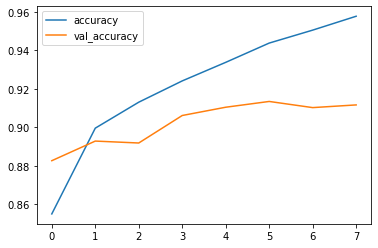

In [16]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

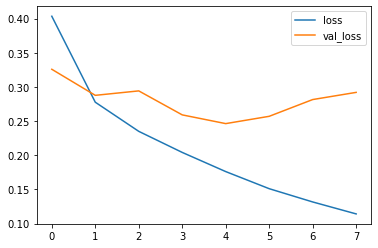

In [17]:
metrics[['loss', 'val_loss']].plot()

In [21]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9117


[0.2920760214328766, 0.9117000102996826]

In [22]:
model.metrics_names

['loss', 'accuracy']

In [82]:
test_image = x_test[256]

In [83]:
test_image = test_image.reshape((1, 28, 28, 1))

In [84]:
test_image.shape

(1, 28, 28, 1)

In [85]:
prediction = model.predict(test_image)

In [86]:
prediction

array([[2.7807837e-13, 1.8183988e-10, 2.6609650e-12, 7.9955351e-13,
        1.3421440e-10, 5.7771726e-14, 4.5818020e-12, 1.1199303e-14,
        1.0000000e+00, 3.8144809e-18]], dtype=float32)

In [87]:
output = prediction.argmax() # this is finding the index of max value in an array

Your model prediction is: Bag
Actual item is the following


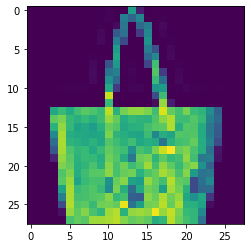

In [88]:
def print_Show_result(item_name, item):
  print(f"Your model prediction is: {item_name}")
  print("Actual item is the following")
  plt.imshow(item.reshape(28,28,1))


if output == 0:
  print_Show_result("T Shirt", test_image)
elif output == 1:
  print_Show_result("Trouser", test_image)
elif output == 2:
  print_Show_result("Pullover", test_image)
elif output == 3:
  print_Show_result("Dress", test_image)
elif output == 4:
  print_Show_result("Coat", test_image)
elif output == 5:
  print_Show_result("Sandal", test_image)
elif output == 6:
  print_Show_result("Shirt", test_image)
elif output == 7:
  print_Show_result("Sneaker", test_image)
elif output == 8:
  print_Show_result("Bag", test_image)
elif output == 9:
  print_Show_result("Ankle boot", test_image)